In [1]:
%config Completer.use_jedi = False
import os, mne
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import gridspec
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
import json
from copy import deepcopy

plt.rc('text', usetex=True) 

font = {'family' : 'serif',
        'size'   : '20',
        'serif' : ['Computer Modern'],
        'sans-serif' : ['Computer Modern']}  

plt.rc('font', **font)
plt.rc('axes', titlesize=28, labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)  

save_dir = 'C:/Users/andersgm/Documents/Courses/02466 Project work F21/Project/Plots/'

#sns.set_style("whitegrid")

In [2]:
#01_tcp_ar

### Patient Statistics

In [3]:
edfs = []
for root, dirs, files in os.walk(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\Experiment\artifact_dataset"):
    for file in files:
        if file.endswith(".edf"):
             edfs.append(root + "\\" + file)


session_lengths = []
sfreqs = []
nchans = []
years = []

for edf in edfs:
    data = mne.io.read_raw_edf(edf, verbose=False)
    if edf.split('\\')[-1] == '00010158_s001_t001.edf': #Fix EDF date mistake
        data.info['meas_date'] = datetime(2013, 1, 1)
    
    session_lengths.append(data.n_times / data.info['sfreq'])
    sfreqs.append(data.info['sfreq'])
    nchans.append(data.info['nchan'])
    years.append(data.info['meas_date'].year)

In [4]:
txts = []
for root, dirs, files in os.walk(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\Experiment\artifact_dataset"):
    for file in files:
        if file.endswith(".txt"):
             txts.append(root + "\\" + file)

age = []
for txt in txts:
    with open(txt, "rb") as file:
        s = file.read().decode('latin-1').lower()
        try:
            if s.find('year') != -1:
                index = s.find('year')
                age.append(int("".join(filter(str.isdigit, s[index-10: index]))))
            elif s.find('yr') != -1:
                index = s.find('yr')
                age.append(int("".join(filter(str.isdigit, s[index-10: index]))))
            elif s.find('yo ') != -1:
                index = s.find('yo ')
                age.append(int("".join(filter(str.isdigit, s[index-10: index]))))
        except:
            pass

In [5]:
print("Average session length: {:.3f}".format(np.mean(session_lengths)))

Average session length: 1161.084


In [6]:
np.mean(age)

52.06153846153846

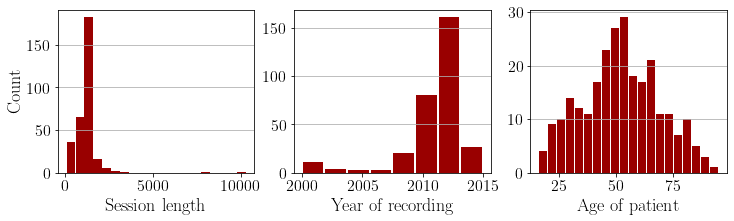

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

ax[0].hist(session_lengths, bins=20, rwidth=0.90, color="#990000")
ax[0].grid(axis='y')
ax[0].set_ylabel(r'{Count}', size=18)
ax[0].set_xlabel(r'{Session length}', size=18)
#ax[0].set_yscale('log')
ax[1].hist(years, bins=8, rwidth=0.90, color="#990000")
ax[1].grid(axis='y')
ax[1].set_xlabel(r'{Year of recording}', size=18)
ax[2].hist(age, bins=20, rwidth=0.90, color="#990000")
ax[2].grid(axis='y')
ax[2].set_xlabel(r'{Age of patient}', size=18)
#plt.tight_layout()
plt.savefig(save_dir + "patient_statistics.png", dpi=1000, bbox_inches = 'tight')
plt.show()

### Artifact Statistics

In [8]:
df = pd.read_pickle(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\dataframe_float32.pkl")

In [9]:
label_dict = {'chew': 0, 'elpp': 1, 'eyem': 2, 'musc': 3, 'shiv': 4, 'null': 5}

In [10]:
with open(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\artifacts.json") as file:
    artifacts = json.load(file)

In [11]:
artifact_lengths = [[], [], [], [], [], []]
for patient in artifacts.values():
    for session in patient.values():
        for start, end, label in session:
            artifact_lengths[label_dict[label]].append(end-start)

In [12]:
print([np.mean(lengths) for lengths in artifact_lengths])

[16.070947959183677, 5.685153776435045, 6.179934807149574, 13.429267518248166, 4.256044927536232, 128.0338426829268]


In [13]:
np.sum(session_lengths)

359936.0

In [14]:
session_length = []

for patient in artifacts.values():
    for session in patient.values():
        mi = float("inf")
        ma = float
        session_length.append(session[-1][1] - session[0][0])

In [15]:
np.sum(session_length)

308846.0

In [16]:
color_dict = {0: "#f5cf40", 1: "#e63f47", 2: "#0ed280", 3: "#fc7323", 4: "#79218f", 5: "#828bf2"} 

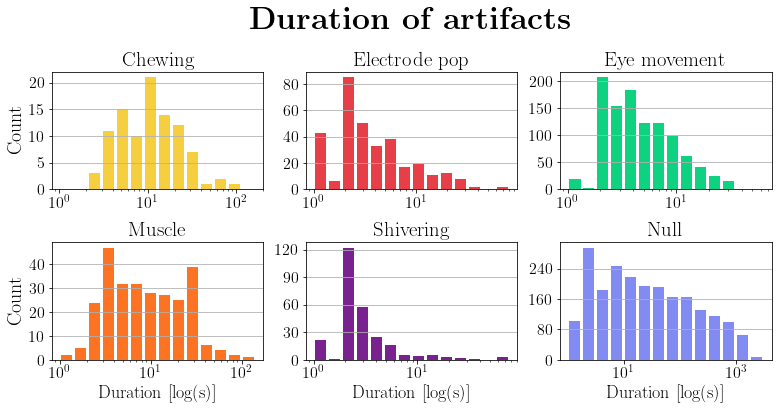

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

gen_bins = lambda a, n: np.power(10, np.linspace(0, np.log10(np.max(a)), n))

ax[0,0].hist(artifact_lengths[0], bins=gen_bins(artifact_lengths[0], 15), rwidth=0.80, color=color_dict[0])
ax[0,0].grid(axis='y')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel('Count')
ax[0,0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,0].title.set_text(r'{\huge {Chewing}')

ax[0,1].hist(artifact_lengths[1], bins=gen_bins(artifact_lengths[1], 15), rwidth=0.80, color=color_dict[1])
ax[0,1].grid(axis='y')
ax[0,1].set_xscale('log')
ax[0,1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,1].title.set_text(r'{\huge {Electrode pop}')

ax[0,2].hist(artifact_lengths[2], bins=gen_bins(artifact_lengths[2], 15), rwidth=0.80, color=color_dict[2])
ax[0,2].grid(axis='y')
ax[0,2].set_xscale('log')
ax[0,2].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,2].title.set_text(r'{\huge {Eye movement}')

ax[1,0].hist(artifact_lengths[3], bins=gen_bins(artifact_lengths[3], 15), rwidth=0.80, color=color_dict[3])
ax[1,0].grid(axis='y')
ax[1,0].set_xscale('log')
ax[1,0].set_ylabel('Count')
ax[1,0].set_xlabel('Duration [log(s)]', size=18)
ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,0].title.set_text(r'{\huge {Muscle}')

ax[1,1].hist(artifact_lengths[4], bins=gen_bins(artifact_lengths[4], 15), rwidth=0.80, color=color_dict[4])
ax[1,1].grid(axis='y')
ax[1,1].set_xscale('log')
ax[1,1].set_xlabel('Duration [log(s)]', size=18)
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,1].title.set_text(r'{\huge {Shivering}')


ax[1,2].hist(artifact_lengths[5], bins=gen_bins(artifact_lengths[5], 15), rwidth=0.80, color=color_dict[5])
ax[1,2].grid(axis='y')
ax[1,2].set_xscale('log')
ax[1,2].set_xlabel(r'Duration [log(s)]', size=18)
ax[1,2].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,2].title.set_text(r'{\huge {Null}')

fig.suptitle(r"\textbf{Duration of artifacts}", size=32)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.45)

plt.savefig(save_dir + "duration_of_artifacts.png", dpi=1000, bbox_inches = 'tight')
plt.show()

In [18]:
for i, length in enumerate(artifact_lengths):
    name = list(label_dict.keys())[list(label_dict.values()).index(i)]
    print("{}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(name, np.min(length), np.max(length), np.mean(length), np.median(length)))

chew	2.30	162.11	16.07	10.18
elpp	0.75	80.18	5.69	3.08
eyem	0.86	63.27	6.18	4.19
musc	1.32	140.10	13.43	8.04
shiv	0.92	76.12	4.26	2.16
null	0.11	2973.03	128.03	16.89


In [19]:
patients_with_artifact = np.zeros(6, dtype=int)

for patient_name in tqdm(np.unique(df["Name"])):
    patients_with_artifact[np.unique(df[df['Name'] == patient_name]["Multiclass label"])] += 1                

100%|████████████████████████████████████████████████████████████████████████████████| 302/302 [00:21<00:00, 13.89it/s]


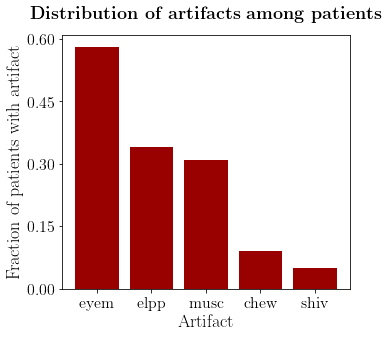

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

mask = np.argsort(patients_with_artifact[:5])[::-1]
names = [list(label_dict.keys())[i] for i in mask]
counts = patients_with_artifact[:5][mask] / len(np.unique(df["Name"]))


ax.bar(names, counts, color="#990000", width=0.8)
ax.set_ylabel('Fraction of patients with artifact', size=18)
ax.set_xlabel('Artifact', size=18)
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.88, 
                    wspace=0.2, 
                    hspace=0.35)

plt.suptitle(r"\textbf{Distribution of artifacts among patients}", size=18)
plt.savefig(save_dir + "distribution_of_artifacts.png", dpi=1000, bbox_inches = 'tight')
plt.show()

In [21]:
hex_to_rgb = lambda s: [int(s[1:3], 16), int(s[3:5], 16), int(s[5:7], 16)] 

In [22]:
def plot_artifacts(ax, y, dataframe):
    image = []
    for label in y:
        image.append(hex_to_rgb(color_dict[label]))
    image = np.array(image)
    image = np.expand_dims(image, 0)
    image = np.tile(np.repeat(image, 2, axis=1), (1, 1, 1))
    ax.set_yticks([])
    ax.imshow(image, interpolation='none', extent=(0, len(y)/4, 0, len(y)/4*(1/10)))
    

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


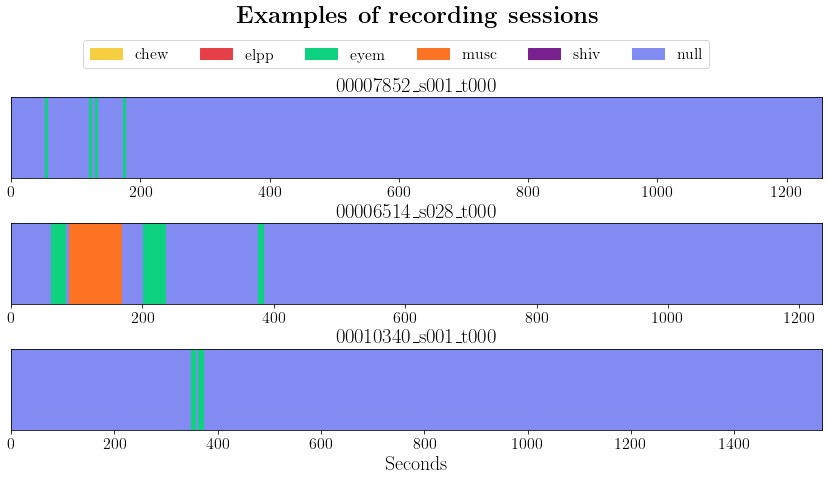

In [26]:
names = list(label_dict.keys())

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))

for i, patient_name in enumerate(np.random.choice(np.unique(df["Name"]), 3)):
    patient = deepcopy(df[df["Name"] == patient_name])
    patient = patient.sort_values(by="Start", ascending=True, key=lambda col: col.values).reset_index(drop=True)
    plot_artifacts(ax[i], patient["Multiclass label"], patient)
    ax[i].title.set_text("{\\huge %s" % (patient_name.replace("_", "\\_")))

ax[2].set_xlabel("Seconds")    
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.77, 
                    wspace=0.4, 
                    hspace=0.55)
handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=color_dict[i], label=names[i]))

ax[0].legend(handles=handles, ncol=6, bbox_to_anchor=(0.87, 1.8)) 

plt.suptitle(r"\textbf{Examples of recording sessions}")

plt.savefig(save_dir + "examples_of_sessions.png", dpi=400, bbox_inches = 'tight')
plt.show()

In [27]:
artifact_windows = [np.stack(df[df["Multiclass label"] == i]["Window"].values) for i in range(6)]

In [28]:
artifact_names = ['Chewing', 'Electrode Pop', 'Eye Movement', 'Muscle', 'Shivering', 'Null']

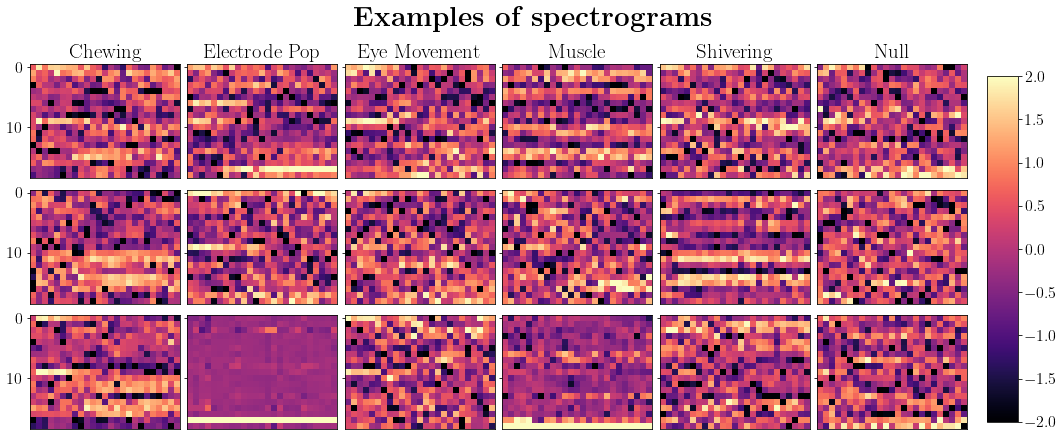

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=6, sharex=True, sharey=True, figsize=(14, 6))
for i, artifact in enumerate(artifact_windows):
    ax[0,i].title.set_text("{\huge %s}" % artifact_names[i])
    for row in range(3):
        idx = np.random.choice(len(artifact))
        x = np.reshape(artifact[idx], (19, 25))
        im = ax[row, i].imshow(x, cmap="magma")
        im.set_clim(-2,2)
        ax[row, i].set_xticks([])
        
plt.subplots_adjust(left=0.0,
            bottom=0.0, 
            right=0.93, 
            top=0.85, 
            wspace=0.05, 
            hspace=0.08)

cbar_ax = fig.add_axes([0.95, 0.02, 0.03, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle(r"\textbf{Examples of spectrograms}", size=28)
plt.savefig(save_dir + "examples_of_spectrograms.png", dpi=250, bbox_inches = 'tight')

plt.show()

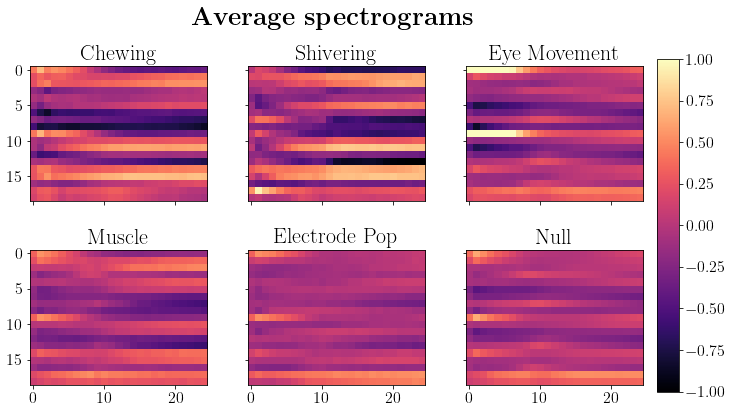

In [30]:
fig, ax = plt.subplots(2, 3, sharey=True, sharex=True, figsize=(10,6))
fig.tight_layout()

electrode_names = ['Fp1', 'F7', 'T3', 'T5', 'F3', 'C3', 'P3', 'O1', 'Cz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'A1', 'A2']

for i, artifact in enumerate(artifact_windows):
    x = np.mean(artifact, axis=0)

    im = ax[i % 2, i % 3].imshow(x, cmap="magma")
    im.set_clim(-1, 1)
    ax[i % 2, i % 3].set_title(artifact_names[i], size=22)

    #if i == 5:
    #    ax[i % 2, i % 3].set_visible(False)

cbar_ax = fig.add_axes([0.95, 0.09, 0.03, 0.77])
fig.colorbar(im, cax=cbar_ax)

plt.subplots_adjust(left=None, bottom=None, right=0.93, top=0.85, wspace=None, hspace=.3)
plt.suptitle(r"\textbf{Average spectrograms}", size=26)
plt.savefig(save_dir + "average_spectrograms.png", dpi=250, bbox_inches = 'tight')
plt.show()

### Channel Statistics

In [43]:
channel_mean = np.mean(artifact, axis=(2))

In [71]:
channel_corr = np.corrcoef(channel_mean.T)

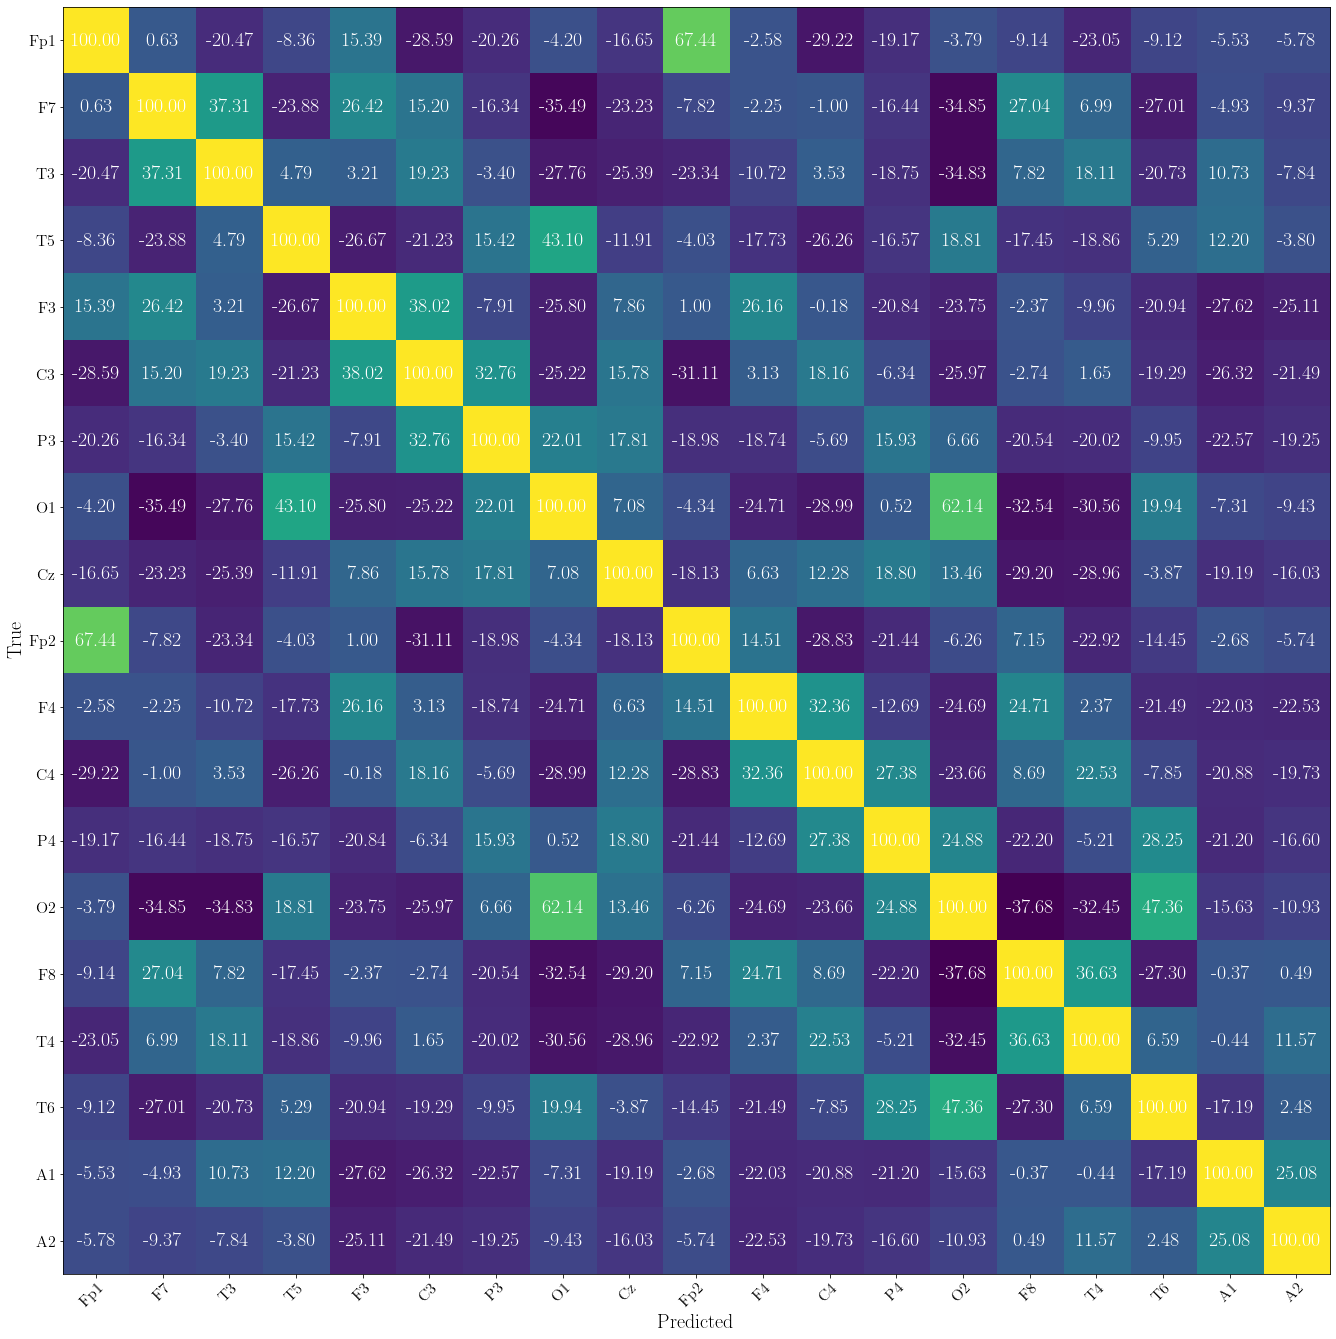

In [72]:
fig, ax = plt.subplots(figsize=(19,19))

m = channel_corr

im = ax.imshow(m)

# We want to show all ticks...
ax.set_xticks(np.arange(19))
ax.set_yticks(np.arange(19))
# ... and label them with the respective list entries
ax.set_xticklabels(electrode_names)
ax.set_yticklabels(electrode_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(19):
    for j in range(19):
        text = ax.text(j, i, "{:.2f}%".format(m[i, j]*100),
                       ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
fig.tight_layout()
plt.show()

In [92]:
artifact_windows

6

In [83]:
electrode_names = np.array(electrode_names)

In [87]:
ytrue

NameError: name 'ytrue' is not defined

In [93]:
X = np.stack(df["Window"].values)

In [98]:
electrode_names

array(['Fp1', 'F7', 'T3', 'T5', 'F3', 'C3', 'P3', 'O1', 'Cz', 'Fp2', 'F4',
       'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'A1', 'A2'], dtype='<U3')

In [99]:
artifact_names

['Chewing', 'Electrode Pop', 'Eye Movement', 'Muscle', 'Shivering', 'Null']

In [101]:
electrode_names[np.argsort(np.abs(np.cov(np.mean(artifact_windows[2], axis=(2)).T))[0])[::-1]]

array(['Fp1', 'Fp2', 'C4', 'C3', 'Cz', 'P3', 'P4', 'A1', 'T4', 'T3', 'F8',
       'O1', 'F3', 'T6', 'O2', 'T5', 'F4', 'A2', 'F7'], dtype='<U3')

In [95]:
electrode_names[np.argsort(np.abs(np.cov(np.mean(X, axis=(2)).T))[0])[::-1]]

array(['Fp1', 'Fp2', 'C4', 'C3', 'T4', 'T3', 'P3', 'P4', 'Cz', 'F3', 'F8',
       'T6', 'T5', 'A1', 'A2', 'F4', 'O1', 'F7', 'O2'], dtype='<U3')

In [73]:
channel_cov = np.cov(channel_mean.T)

In [78]:
for i in range(19):
    for j in range(19):
        print("{:.2f} ".format(channel_cov[i,j]), end="")
    print()

0.19 0.00 -0.03 -0.01 0.02 -0.05 -0.03 -0.01 -0.03 0.12 -0.00 -0.05 -0.03 -0.01 -0.01 -0.04 -0.01 -0.01 -0.01 
0.00 0.14 0.05 -0.03 0.03 0.02 -0.02 -0.05 -0.04 -0.01 -0.00 -0.00 -0.02 -0.05 0.04 0.01 -0.03 -0.01 -0.02 
-0.03 0.05 0.13 0.01 0.00 0.03 -0.00 -0.04 -0.04 -0.04 -0.01 0.00 -0.03 -0.05 0.01 0.02 -0.03 0.02 -0.01 
-0.01 -0.03 0.01 0.11 -0.03 -0.03 0.02 0.05 -0.02 -0.01 -0.02 -0.03 -0.02 0.03 -0.02 -0.02 0.01 0.02 -0.01 
0.02 0.03 0.00 -0.03 0.12 0.05 -0.01 -0.04 0.01 0.00 0.03 -0.00 -0.03 -0.03 -0.00 -0.01 -0.03 -0.06 -0.05 
-0.05 0.02 0.03 -0.03 0.05 0.13 0.04 -0.04 0.02 -0.05 0.00 0.02 -0.01 -0.04 -0.00 0.00 -0.02 -0.06 -0.04 
-0.03 -0.02 -0.00 0.02 -0.01 0.04 0.12 0.03 0.03 -0.03 -0.02 -0.01 0.02 0.01 -0.03 -0.02 -0.01 -0.04 -0.03 
-0.01 -0.05 -0.04 0.05 -0.04 -0.04 0.03 0.15 0.01 -0.01 -0.03 -0.04 0.00 0.10 -0.05 -0.04 0.03 -0.02 -0.02 
-0.03 -0.04 -0.04 -0.02 0.01 0.02 0.03 0.01 0.17 -0.03 0.01 0.02 0.03 0.02 -0.04 -0.04 -0.01 -0.05 -0.03 
0.12 -0.01 -0.04 -0.01 0.00 -0.0

In [51]:
electrode_names

['Fp1',
 'F7',
 'T3',
 'T5',
 'F3',
 'C3',
 'P3',
 'O1',
 'Cz',
 'Fp2',
 'F4',
 'C4',
 'P4',
 'O2',
 'F8',
 'T4',
 'T6',
 'A1',
 'A2']

In [55]:
channel_cov[0,0]

0.19001011828520714

In [67]:
np.corrcoef(channel_mean.T)

array([[ 1.        ,  0.0062728 , -0.20469265, -0.08359519,  0.15387612,
        -0.285869  , -0.20260583, -0.04199799, -0.16651999,  0.67443989,
        -0.02582521, -0.29223153, -0.19173176, -0.03793283, -0.09136719,
        -0.23048017, -0.09124696, -0.05526987, -0.05780472],
       [ 0.0062728 ,  1.        ,  0.37314223, -0.23879172,  0.26418378,
         0.15202882, -0.16341502, -0.35494809, -0.23228154, -0.07823717,
        -0.02252151, -0.01000632, -0.16443666, -0.34845161,  0.27037577,
         0.06992565, -0.2700962 , -0.04930696, -0.09368113],
       [-0.20469265,  0.37314223,  1.        ,  0.04785594,  0.03205874,
         0.1923054 , -0.03402362, -0.27760717, -0.25391641, -0.23339027,
        -0.10717642,  0.03533609, -0.18751673, -0.34828531,  0.07823076,
         0.18107408, -0.20726264,  0.10729884, -0.07840797],
       [-0.08359519, -0.23879172,  0.04785594,  1.        , -0.26669833,
        -0.21230095,  0.15424071,  0.43096719, -0.11907465, -0.04034501,
        -0.177

In [52]:
channel_cov[0]

array([ 0.19001012,  0.00102347, -0.03264023, -0.01184316,  0.02360546,
       -0.04576167, -0.03041351, -0.0071007 , -0.029999  ,  0.12106619,
       -0.00379382, -0.04638193, -0.03088025, -0.00680223, -0.01430202,
       -0.03527107, -0.01350493, -0.01391942, -0.01309339])

In [33]:
artifact.shape

(1303270, 19, 25)